### Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

### Loading Dataset

In [3]:
train_data = pd.read_csv("/content/drive/MyDrive/Airline_Pass_Satisfaction/train 2.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Airline_Pass_Satisfaction/test 2.csv")

In [4]:
train_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
test_data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied


In [6]:
train_data.shape

(103904, 25)

In [7]:
test_data.shape

(25976, 25)

In [8]:
train_data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
test_data.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
train_data.dropna(inplace=True)
test_data.dropna(inplace =True)

In [11]:
train_data.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [17]:
def drops(data):
  data.drop({"Unnamed: 0","id"},axis=1,inplace=True)
  
  data["Gender"] = data["Gender"].map({"Male":1,"Female":0})
  data["Customer Type"] = data["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})
  data["Type of Travel"] = data["Type of Travel"].map({"Business travel":1,"Personal Travel":0})
  data = pd.get_dummies(data,columns = ["Class"])

  return data

In [16]:
train_data["Class"].value_counts()

Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64

In [18]:
data = drops(train_data)

In [19]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,13,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0,0,1
1,1,0,25,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1,0,0
3,0,1,25,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,1,0,0
4,1,1,61,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1,0,0


In [20]:
data_test = drops(test_data)

In [21]:
data_test.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,satisfied,1,0,0
2,1,0,20,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,satisfied,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,satisfied,0,1,0


In [22]:
ytrain_target = data["satisfaction"]
xtrain_feature = data.drop({"satisfaction"},axis=1)

In [23]:
xtrain_feature.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,1,1,13,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,0,0,1
1,1,0,25,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,1,0,0
2,0,1,26,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,1,0,0
3,0,1,25,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,1,0,0
4,1,1,61,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,1,0,0


In [24]:
ytest_target = data_test["satisfaction"]
xtest_feature = data_test.drop({"satisfaction"},axis=1)

In [25]:
xtest_feature.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,52,1,160,5,4,3,4,3,4,3,5,5,5,5,2,5,5,50,44.0,0,1,0
1,0,1,36,1,2863,1,1,3,1,5,4,5,4,4,4,4,3,4,5,0,0.0,1,0,0
2,1,0,20,1,192,2,0,2,4,2,2,2,2,4,1,3,2,2,2,0,0.0,0,1,0
3,1,1,44,1,3377,0,0,0,2,3,4,4,1,1,1,1,3,1,4,0,6.0,1,0,0
4,0,1,49,1,1182,2,3,4,3,4,1,2,2,2,2,2,4,2,4,0,20.0,0,1,0


In [26]:
ytrain_target.head()

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: object

In [27]:
ytrain_target.value_counts()

neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64

In [29]:
y_train = ytrain_target.map({"neutral or dissatisfied":0,"satisfied":1})
y_test = ytest_target.map({"neutral or dissatisfied":0,"satisfied":1})

In [30]:
y_train.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

In [31]:
y_test.head()

0    1
1    1
2    0
3    1
4    1
Name: satisfaction, dtype: int64

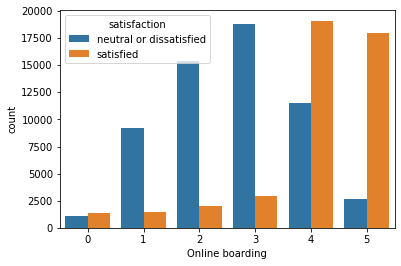

In [32]:
sns.countplot(x="Online boarding",hue="satisfaction",data=train_data)

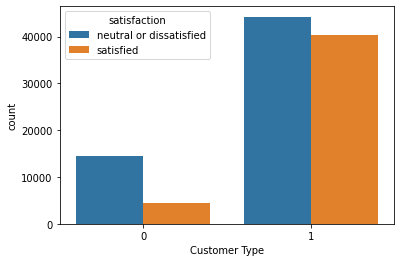

In [33]:
sns.countplot(x="Customer Type",hue="satisfaction",data=train_data)

### XGBOOST Model

In [34]:
xgb = XGBClassifier()
xgb.fit(xtrain_feature,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [35]:
pred = xgb.predict(xtest_feature)

In [37]:
accuracy_score(y_test,pred)

0.9413741165565983

In [39]:
mean_squared_error(y_test,pred)

0.058625883443401694

### Bagging Random Forest

In [41]:
rfc = RandomForestClassifier()
rfc.fit(xtrain_feature,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
pred = rfc.predict(xtest_feature)

In [43]:
accuracy_score(y_test,pred)

0.9624608967674662

### Logistic Regression

In [44]:
lr = LogisticRegression()
lr.fit(xtrain_feature,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
pred = lr.predict(xtest_feature)

In [47]:
accuracy_score(y_test,pred)

0.8075155447418221